In [43]:
from pylab import *
import pandas as pd

In [41]:
def cface(ax, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14,
          x15, x16, x17, x18):
    # x1 = height  of upper face
    # x2 = overlap of lower face
    # x3 = half of vertical size of face
    # x4 = width of upper face
    # x5 = width of lower face
    # x6 = length of nose
    # x7 = vertical position of mouth
    # x8 = curvature of mouth
    # x9 = width of mouth
    # x10 = vertical position of eyes
    # x11 = separation of eyes
    # x12 = slant of eyes
    # x13 = eccentricity of eyes
    # x14 = size of eyes
    # x15 = position of pupils
    # x16 = vertical position of eyebrows
    # x17 = slant of eyebrows
    # x18 = size of eyebrows
    
    # transform some values so that input between
    # 0,1 yields variety of output
    x3 = 1.9*(x3-.5)
    x4 = (x4+.25)
    x5 = (x5+.2)
    x6 = .3*(x6+.01)
    x8 = 5*(x8+.001)
    x11 /= 5
    x12 = 2*(x12-.5)
    x13 += .05
    x14 += .1
    x15 = .5*(x15-.5)
    x16 = .25*x16
    x17 = .5*(x17-.5)
    x18 = .5*(x18+.1)

    # top of face, in box with l=-x4, r=x4, t=x1, b=x3
    e1 = mpl.patches.Ellipse((0, (x1 + x3)/2), 2*x4, (x1 - x3), ec='k',
                             fc='w', linewidth=2)
    ax.add_artist(e1)

    # bottom of face, in box with l=-x5, r=x5, b=-x1, t=x2+x3
    e2 = mpl.patches.Ellipse((0, (-x1 + x2 + x3)/2), 2*x5, (x1 + x2 + x3),
                             fc='w', ec='k', linewidth=2)
    ax.add_artist(e2)

    # cover overlaps
    e3 = mpl.patches.Ellipse((0, (x1 + x3)/2), 2*x4, (x1 - x3), fc='white',
                             ec='none')
    ax.add_artist(e3)
    e4 = mpl.patches.Ellipse((0, (-x1 + x2 + x3)/2), 2*x5, (x1 + x2 + x3),
                             fc='white', ec='none')
    ax.add_artist(e4)
    
    # draw nose
    plot([0, 0], [-x6/2, x6/2], 'k')
    
    # draw mouth
    p1 = mpl.patches.Arc((0, -x7 + .5/x8), 1/x8, 1/x8,
                         theta1=270-180/pi*arctan(x8*x9),
                         theta2=270+180/pi*arctan(x8*x9))
    ax.add_artist(p1)
    
    # draw eyes
    p2 = mpl.patches.Ellipse((-x11 - x14/2, x10), x14, x13*x14,
                             angle=-180/pi*x12, facecolor='white')
    ax.add_artist(p2)
    
    p3 = mpl.patches.Ellipse((x11 + x14/2, x10), x14, x13*x14,
                             angle=180/pi*x12, facecolor='white')
    ax.add_artist(p3)

    # draw pupils
    p4 = mpl.patches.Ellipse((-x11 - x14/2 - x15*x14/2, x10), .05, .05,
                             facecolor='black')
    ax.add_artist(p4)
    p5 = mpl.patches.Ellipse((x11 + x14/2 - x15*x14/2, x10), .05, .05,
                             facecolor='black')
    ax.add_artist(p5)
    
    # draw eyebrows
    plot([-x11 - x14/2 - x14*x18/2, -x11 - x14/2 + x14*x18/2],
         [x10 + x13*x14*(x16 + x17), x10 + x13*x14*(x16 - x17)], 'k')
    plot([x11 + x14/2 + x14*x18/2, x11 + x14/2 - x14*x18/2],
         [x10 + x13*x14*(x16 + x17), x10 + x13*x14*(x16 - x17)], 'k')

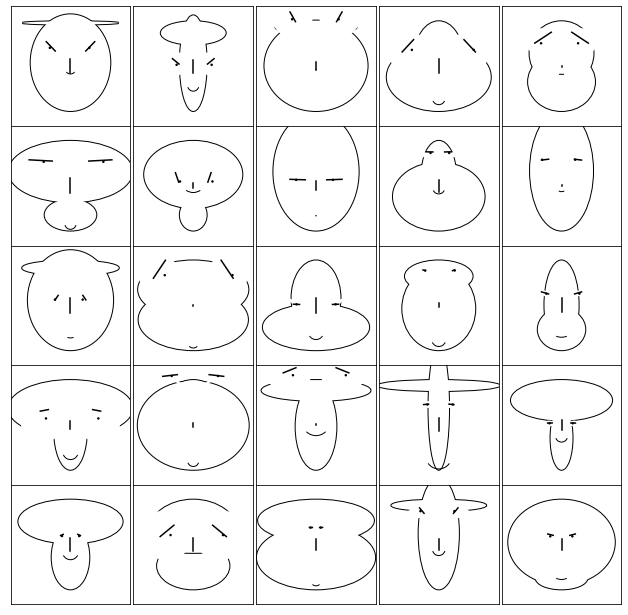

In [42]:
fig = figure(figsize=(11,11))
for i in range(25):
    ax = fig.add_subplot(5, 5, i+1, aspect='equal')
    cface(ax, .9, *rand(17))
    ax.axis([-1.2, 1.2, -1.2, 1.2])
    ax.set_xticks([])
    ax.set_yticks([])
fig.subplots_adjust(hspace=0, wspace=0)

In [99]:
def reduced_cface(ax, hrp2, pldh, pvldh, crp, pfldh=None):
    # x1 = height  of upper face
    x1 = 0.9
    # x2 = overlap of lower face
    x2 = 0.5
    # x3 = half of vertical size of face
    x3 = 0.3
    # x4 = width of upper face
    x4 = hrp2
    # x5 = width of lower face
    x5 = pldh
    # x6 = length of nose
    x6 = crp
    # x7 = vertical position of mouth
    x7 = 0.5
    # x8 = curvature of mouth
    x8 = pvldh
    # x9 = width of mouth
    x9 = 0.3
    # x10 = vertical position of eyes
    x10 = 0.5
    # x11 = separation of eyes
    x11 = 0.5
    # x12 = slant of eyes
    x12 = 0.5
    # x13 = eccentricity of eyes
    x13 = 0.5
    # x14 = size of eyes
    x14 = 0.5
    # x15 = position of pupils
    x15 = 0.5
    # x16 = vertical position of eyebrows
    x16 = 1.0
    # x17 = slant of eyebrows
    if pfldh:
        x17 = pfldh
    else:
        x17 = 0.5
    # x18 = size of eyebrows
    x18 = 0.5
    
    # transform some values so that input between
    # 0,1 yields variety of output
    x3 = 1.9*(x3-.5)
    x4 = (x4+.25)
    x5 = (x5+.2)
    x6 = .3*(x6+.01)
    x8 = 5*(x8+.001)
    x11 /= 5
    x12 = 2*(x12-.5)
    x13 += .05
    x14 += .1
    x15 = .5*(x15-.5)
    x16 = .25*x16
    x17 = .5*(x17-.5)
    x18 = .5*(x18+.1)

    # top of face, in box with l=-x4, r=x4, t=x1, b=x3
    e1 = mpl.patches.Ellipse((0, (x1 + x3)/2), 2*x4, (x1 - x3), ec='k',
                             fc='w', linewidth=2)
    ax.add_artist(e1)

    # bottom of face, in box with l=-x5, r=x5, b=-x1, t=x2+x3
    e2 = mpl.patches.Ellipse((0, (-x1 + x2 + x3)/2), 2*x5, (x1 + x2 + x3),
                             fc='w', ec='k', linewidth=2)
    ax.add_artist(e2)

    # cover overlaps
    e3 = mpl.patches.Ellipse((0, (x1 + x3)/2), 2*x4, (x1 - x3), fc='white',
                             ec='none')
    ax.add_artist(e3)
    e4 = mpl.patches.Ellipse((0, (-x1 + x2 + x3)/2), 2*x5, (x1 + x2 + x3),
                             fc='white', ec='none')
    ax.add_artist(e4)
    
    # draw nose
    plot([0, 0], [-x6/2, x6/2], 'k')
    
    # draw mouth
    p1 = mpl.patches.Arc((0, -x7 + .5/x8), 1/x8, 1/x8,
                         theta1=270-180/pi*arctan(x8*x9),
                         theta2=270+180/pi*arctan(x8*x9))
    ax.add_artist(p1)
    
    # draw eyes
    p2 = mpl.patches.Ellipse((-x11 - x14/2, x10), x14, x13*x14,
                             angle=-180/pi*x12, facecolor='white')
    ax.add_artist(p2)
    
    p3 = mpl.patches.Ellipse((x11 + x14/2, x10), x14, x13*x14,
                             angle=180/pi*x12, facecolor='white')
    ax.add_artist(p3)

    # draw pupils
    p4 = mpl.patches.Ellipse((-x11 - x14/2 - x15*x14/2, x10), .05, .05,
                             facecolor='black')
    ax.add_artist(p4)
    p5 = mpl.patches.Ellipse((x11 + x14/2 - x15*x14/2, x10), .05, .05,
                             facecolor='black')
    ax.add_artist(p5)
    
    # draw eyebrows
    plot([-x11 - x14/2 - x14*x18/2, -x11 - x14/2 + x14*x18/2],
         [x10 + x13*x14*(x16 + x17), x10 + x13*x14*(x16 - x17)], 'k')
    plot([x11 + x14/2 + x14*x18/2, x11 + x14/2 - x14*x18/2],
         [x10 + x13*x14*(x16 + x17), x10 + x13*x14*(x16 - x17)], 'k')

In [100]:
actual_df = pd.read_csv('C:/Users/lzoeckler/Desktop/qfu/binned/QV4_4plex_NIH_clinical.csv')
data_cols = ['quansys_HRP2_pg_ml', 'quansys_LDH_Pan_pg_ml', 'quansys_LDH_Pv_pg_ml',
             'quansys_CRP_ng_ml']
actual_df = actual_df[data_cols]
actual_df.dropna(inplace=True)
for col in data_cols:
    col_min = actual_df[col].min()
    col_max = actual_df[col].max()
    actual_df[col] = (actual_df[col] - col_min) / (col_max - col_min)
print(len(actual_df))
actual_df.head()

689


,quansys_HRP2_pg_ml,quansys_LDH_Pan_pg_ml,quansys_LDH_Pv_pg_ml,quansys_CRP_ng_ml
0,0.000000,0.000019,0.027498,0.008118
1,0.000013,0.000025,0.043153,0.002835
2,0.066420,0.000332,0.021364,0.000352
3,0.304488,0.000000,0.000000,0.000000
4,0.000000,0.000010,0.028699,0.003230


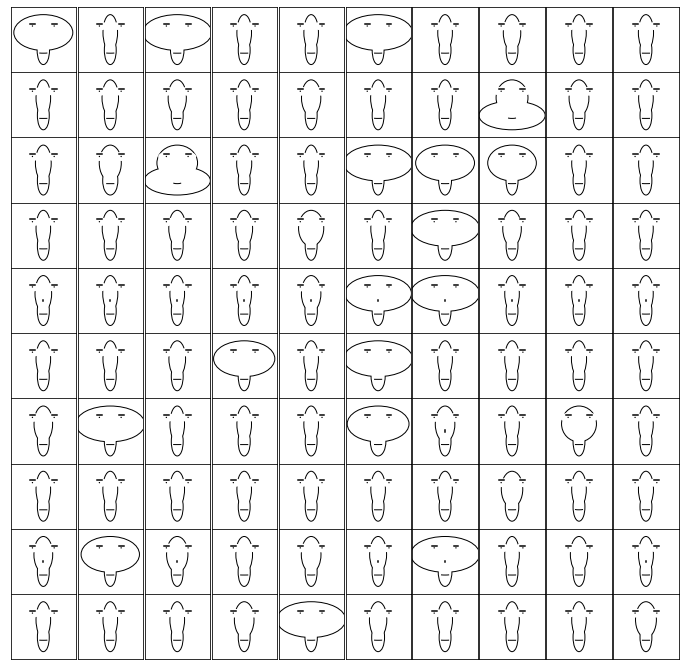

In [102]:
test_df = actual_df.sample(100)
fig = figure(figsize=(12,12))
i = 1
for row in test_df.itertuples(index=True, name='Pandas'):
    hrp2 = getattr(row, 'quansys_HRP2_pg_ml')
    pldh = getattr(row, 'quansys_LDH_Pan_pg_ml')
    pvldh = getattr(row, 'quansys_LDH_Pv_pg_ml')
    #pfldh = getattr(row, 'quansys_LDH_Pf_pg_ml')
    crp = getattr(row, 'quansys_CRP_ng_ml')
    ax = fig.add_subplot(10,10, i, aspect='equal')
    reduced_cface(ax, hrp2, pldh, pvldh, crp)
    ax.axis([-1.2, 1.2, -1.2, 1.2])
    ax.set_xticks([])
    ax.set_yticks([])
    i += 1
fig.subplots_adjust(hspace=0, wspace=0)